# Codeforces Contest & User Data Analysis 2
## 1. Extract Data from Codeforces
## 1.1 Create a list of contests using the contest.list endpoint

In [1]:
import requests
import json

url = "https://codeforces.com/api/contest.list"

# First, get the response
response = requests.get(url)

# Check status code before trying to parse JSON
if response.status_code == 200:
    data = response.json()
    print(json.dumps(data, indent=4))  # Print nicely formatted JSON
else:
    print("Error retrieving data:", response.status_code)

{
    "status": "OK",
    "result": [
        {
            "id": 2101,
            "name": "Codeforces Round (Div. 1)",
            "type": "CF",
            "phase": "BEFORE",
            "frozen": false,
            "durationSeconds": 9000,
            "startTimeSeconds": 1746974100,
            "relativeTimeSeconds": -2171519
        },
        {
            "id": 2102,
            "name": "Codeforces Round (Div. 2)",
            "type": "CF",
            "phase": "BEFORE",
            "frozen": false,
            "durationSeconds": 9000,
            "startTimeSeconds": 1746974100,
            "relativeTimeSeconds": -2171519
        },
        {
            "id": 2099,
            "name": "Codeforces Round (Div. 1)",
            "type": "CF",
            "phase": "BEFORE",
            "frozen": false,
            "durationSeconds": 7200,
            "startTimeSeconds": 1746261300,
            "relativeTimeSeconds": -1458719
        },
        {
            "id": 2100,
            "

In [2]:
from datetime import datetime

# Load contest list from data
contests = data["result"]

contests

[{'id': 2101,
  'name': 'Codeforces Round (Div. 1)',
  'type': 'CF',
  'phase': 'BEFORE',
  'frozen': False,
  'durationSeconds': 9000,
  'startTimeSeconds': 1746974100,
  'relativeTimeSeconds': -2171519},
 {'id': 2102,
  'name': 'Codeforces Round (Div. 2)',
  'type': 'CF',
  'phase': 'BEFORE',
  'frozen': False,
  'durationSeconds': 9000,
  'startTimeSeconds': 1746974100,
  'relativeTimeSeconds': -2171519},
 {'id': 2099,
  'name': 'Codeforces Round (Div. 1)',
  'type': 'CF',
  'phase': 'BEFORE',
  'frozen': False,
  'durationSeconds': 7200,
  'startTimeSeconds': 1746261300,
  'relativeTimeSeconds': -1458719},
 {'id': 2100,
  'name': 'Codeforces Round (Div. 2)',
  'type': 'CF',
  'phase': 'BEFORE',
  'frozen': False,
  'durationSeconds': 7200,
  'startTimeSeconds': 1746261300,
  'relativeTimeSeconds': -1458719},
 {'id': 2104,
  'name': 'Educational Codeforces Round 178 (Rated for Div. 2)',
  'type': 'ICPC',
  'phase': 'BEFORE',
  'frozen': False,
  'durationSeconds': 7200,
  'startTime

### 1.2 Filter

In [3]:
from datetime import datetime

# Load contest list from data
contests = data["result"]

# Define filters
keywords = ["Hello", "Round", "Good Bye"]
start_date = datetime(2024, 7, 1) # July 2024
end_date = datetime(2024, 12, 31) # December 2024

# Filter contests
filtered_contests = []
for contest in contests:
    if "startTimeSeconds" in contest:                                      # This line checks if the contest has a key called startTimeSeconds.
        contest_date = datetime.fromtimestamp(contest["startTimeSeconds"]) # We convert the Unix timestamp (startTimeSeconds) to a human-readable datetime object.
        if start_date <= contest_date <= end_date:                         # Only contests that happened within this range will pass.
            if any(keyword in contest["name"] for keyword in keywords):    # This line checks if the contest name contains any of the keywords we're looking for:
                filtered_contests.append({                                 # If the contest passes both the date and keyword checks, we add a simplified dictionary to our list filtered_contests.
                    "id": contest["id"],
                    "name": contest["name"],
                    "start_time": contest_date.strftime("%Y-%m-%d %H:%M:%S")
                })

# Show filtered contests
print(f"✅ Found {len(filtered_contests)} contests between July-Dec 2024 with required keywords.\n")
for c in filtered_contests:
    print(f"- {c['start_time']} | {c['id']} | {c['name']}")

✅ Found 57 contests between July-Dec 2024 with required keywords.

- 2024-12-28 09:35:00 | 2053 | Good Bye 2024: 2025 is NEAR
- 2024-12-24 09:35:00 | 2043 | Educational Codeforces Round 173 (Rated for Div. 2)
- 2024-12-22 09:35:00 | 2051 | Codeforces Round 995 (Div. 3)
- 2024-12-20 09:35:00 | 2049 | Codeforces Round 994 (Div. 2)
- 2024-12-19 09:35:00 | 2048 | Codeforces Global Round 28
- 2024-12-15 09:35:00 | 2044 | Codeforces Round 993 (Div. 4)
- 2024-12-08 09:35:00 | 2040 | Codeforces Round 992 (Div. 2)
- 2024-12-05 09:35:00 | 2050 | Codeforces Round 991 (Div. 3)
- 2024-12-03 01:25:00 | 2046 | Codeforces Round 990 (Div. 1)
- 2024-12-03 01:25:00 | 2047 | Codeforces Round 990 (Div. 2)
- 2024-12-02 09:35:00 | 2042 | Educational Codeforces Round 172 (Rated for Div. 2)
- 2024-11-30 09:35:00 | 2034 | Rayan Programming Contest 2024 - Selection (Codeforces Round 989, Div. 1 + Div. 2)
- 2024-11-23 09:35:00 | 2039 | CodeTON Round 9 (Div. 1 + Div. 2, Rated, Prizes!)
- 2024-11-17 09:35:00 | 2037

### 1.3 Data extraction using endpoints

#### API Endpoints Used
- `contest.list`: Retrieves metadata for all past and upcoming Codeforces contests. Used to filter contests by date and name (e.g., "Round", "Hello", "Good Bye").
- `contest.standings`**: Provides the list of problems in a contest and the top participants.
- `contest.status`: Lists all the submissions made during a contest.
- `contest.ratingChanges`**: Contains the rating updates for users who participated in rated contests.
- `user.ratedList`: Lists all rated Codeforces users and their current info.

##### 📄 File: standings_problems.csv

This file contains information about each problem in a Codeforces contest. Each row represents one problem.

**Level of data**: Per problem

**Key variables:**
- `contestId`: ID of the contest the problem belongs to
- `index`: Problem label (e.g., A, B1, C)
- `name`: Title of the problem
- `type`: Usually "PROGRAMMING"
- `points`: Point value assigned to the problem (used in scoring)
- `rating`: Estimated difficulty level (used for user ratings)
- `tags`: List of concepts tested in the problem (e.g., 'greedy', 'brute force', 'dp')

##### 📄 File: standings_rows.csv

This file contains the top participants in a Codeforces contest. Each row represents one contestant or team.

**Level of data**: Per contestant

**Key variables:**
- `party`: Participant info
- `rank`: Final rank in the contest
- `points`: Total score achieved
- `penalty`: Time penalties applied (for tie-breaking)
- `successfulHackCount`: Number of successful hacks performed
- `unsuccessfulHackCount`: Number of unsuccessful hacks attempted
- `problemResults`: A list of results per problem (points, attempts, time, etc.)

##### 📄 File: submissions.csv

This file contains every submission made during a Codeforces contest. Each row represents **one code submission** from a participant.

**Level of data**: Per submission

**Key variables:**
- `id`: Unique submission ID
- `contestId`: ID of the contest the submission belongs to
- `creationTimeSeconds`: Unix timestamp of the submission
- `relativeTimeSeconds`: Time since the contest began (in seconds)
- `problem`: Dictionary with problem info (e.g., index, name, rating)
- `author`: Dictionary with user/team info (e.g., handle, participantType)
- `programmingLanguage`: Language used to submit the solution
- `verdict`: Outcome of the submission (e.g., `OK`, `WRONG_ANSWER`)
- `testset`: Test set used (usually `"TESTS"`)
- `passedTestCount`: Number of tests passed
- `timeConsumedMillis`: Execution time in milliseconds
- `memoryConsumedBytes`: Memory used in bytes

##### 📄 File: rating_changes.csv

This file contains information about rating changes for each participant in a rated Codeforces contest. Each row represents **one contestant** who received a rating update.

**Level of data**: Per contestant

**Key variables:**
- `contestId`: ID of the contest
- `contestName`: Name/title of the contest
- `handle`: Codeforces username of the contestant
- `rank`: Final placement in the contest
- `ratingUpdateTimeSeconds`: Unix timestamp of the rating update
- `oldRating`: Rating before the contest
- `newRating`: Rating after the contest

##### 🌍 File: user_rated_list.csv

This dataset contains global information about all **rated users** on Codeforces, as retrieved from the `user.ratedList` API endpoint.

Each row corresponds to **one user**, regardless of contest participation.

**Level of data**: Per user (global)

**Key variables:**
- `handle`: Codeforces username
- `rating`: Current rating
- `maxRating`: Highest rating the user has ever reached
- `rank`: Current rank title (e.g., `expert`, `grandmaster`)
- `maxRank`: Historical highest rank
- `country`, `city`: Location (if user provided it)
- `organization`: Affiliation such as university or company
- `firstName`, `lastName`: Public display name (optional)
- `friendOfCount`: Number of people who follow this user
- `contribution`: Score for contributions to Codeforces (e.g., blogs, comments)
- `registrationTimeSeconds`: When the user registered (Unix timestamp)
- `avatar`, `titlePhoto`: URLs to user profile and rank images
- `email`, `openId`, `vkId`: Additional public identifiers (optional, may contain missing values)

Create a function that sends a request to a Codeforces API endpoint with params, and saves the response into a folder under the given filename.

In [4]:
import os
import time
import pandas as pd

def fetch_and_save(endpoint, params, folder, filename): 
    url = f"https://codeforces.com/api/{endpoint}"      # Builds the API URL.
    response = requests.get(url, params=params)         # Makes the request.
    time.sleep(1)                                       # delay between requests

    if response.status_code == 200:                     # Checks if the request worked (200 = OK).
        data = response.json()                          # Converts the JSON response into a Python dictionary.
        with open(os.path.join(folder, f"{filename}.json"), "w", encoding="utf-8") as f:
            json.dump(data, f, indent=4)                # Saves as a .json file. 

        if isinstance(data.get("result"), list):        # If the result is a list, save it as a CSV using pandas.
            df = pd.DataFrame(data["result"])
            df.to_csv(os.path.join(folder, f"{filename}.csv"), index=False)
            
        elif isinstance(data.get("result"), dict):      # Special case: if the result is a dictionary, extract sub-elements like "problems" and "rows" and save them as separate CSVs.
            if "problems" in data["result"]:            
                pd.DataFrame(data["result"]["problems"]).to_csv(os.path.join(folder, f"{filename}_problems.csv"), index=False)
            if "rows" in data["result"]:
                pd.DataFrame(data["result"]["rows"]).to_csv(os.path.join(folder, f"{filename}_rows.csv"), index=False)
                
    else:                                               # If the request failed, print an error.
        print(f"❌ Failed to fetch {endpoint} for contest {params['contestId']} (status {response.status_code})")

/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/ss/cd9tm42d70b4w66dyk07_fzm0000gn/T/ipykernel_13709/1903058996.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Create folder for each contest

In [5]:
for contest in filtered_contests:                                   # Loop through each filtered contest
    contest_id = contest["id"]                                      # Get contest ID 
    safe_name = contest["name"].replace(" ", "_").replace("/", "-") # Clean up the name to use as a folder.
    folder = f"contest_{contest_id}_{safe_name}"                    # Create a folder like: contest_1971_Codeforces_Round_940.

    os.makedirs(folder, exist_ok=True)                  
    print(f"\n📁 Created folder: {folder}")


📁 Created folder: contest_2053_Good_Bye_2024:_2025_is_NEAR

📁 Created folder: contest_2043_Educational_Codeforces_Round_173_(Rated_for_Div._2)

📁 Created folder: contest_2051_Codeforces_Round_995_(Div._3)

📁 Created folder: contest_2049_Codeforces_Round_994_(Div._2)

📁 Created folder: contest_2048_Codeforces_Global_Round_28

📁 Created folder: contest_2044_Codeforces_Round_993_(Div._4)

📁 Created folder: contest_2040_Codeforces_Round_992_(Div._2)

📁 Created folder: contest_2050_Codeforces_Round_991_(Div._3)

📁 Created folder: contest_2046_Codeforces_Round_990_(Div._1)

📁 Created folder: contest_2047_Codeforces_Round_990_(Div._2)

📁 Created folder: contest_2042_Educational_Codeforces_Round_172_(Rated_for_Div._2)

📁 Created folder: contest_2034_Rayan_Programming_Contest_2024_-_Selection_(Codeforces_Round_989,_Div._1_+_Div._2)

📁 Created folder: contest_2039_CodeTON_Round_9_(Div._1_+_Div._2,_Rated,_Prizes!)

📁 Created folder: contest_2037_Codeforces_Round_988_(Div._3)

📁 Created folder: c

Create IDs List

In [9]:
import os

# Ruta donde están tus carpetas (cambia si es diferente)
path = "/Users/rominarattoyanez"

# Obtener lista de carpetas con el formato correcto
contest_ids = []

for folder in os.listdir(path):
    if folder.startswith("contest_"):
        try:
            contest_id = int(folder.split("_")[1])
            contest_ids.append(contest_id)
        except:
            continue

print(sorted(contest_ids))

[1983, 1988, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2013, 2014, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2039, 2040, 2042, 2043, 2044, 2046, 2047, 2048, 2049, 2050, 2051, 2053]


Fetch Data

In [10]:
'''Para un solo concurso:

 fetch_and_save(
        "contest.standings",
        {"contestId": contest_id, "from": 1, "count": 10},  
        folder,
        "standings"
    )

    fetch_and_save(
        "contest.status",
        {"contestId": contest_id},
        folder,
        "submissions"
    )

    fetch_and_save(
        "contest.ratingChanges",
        {"contestId": contest_id},
        folder,
        "rating_changes"
    )
'''

# Ejecutar para cada concurso
for contest_id in contest_ids:

    # 1. contest.standings — info + problems + participants
    fetch_and_save("contest.standings", {"contestId": contest_id, "from": 1, "count": 10}, folder, "standings") # top 10 participants (you can increase this count later)
    
    # 2. contest.status — all submissions
    fetch_and_save("contest.status", {"contestId": contest_id}, folder, "submissions")
    
    # 3. contest.ratingChanges — user rating deltas
    fetch_and_save("contest.ratingChanges", {"contestId": contest_id}, folder, "rating_changes")

print("\n✅ Todos los concursos fueron procesados.")


✅ Todos los concursos fueron procesados.


In [18]:
# 4. user.ratedList

import requests
import pandas as pd

# 1. Hacer la solicitud a user.ratedList
url = "https://codeforces.com/api/user.ratedList"
response = requests.get(url)

# 2. Guardar si fue exitosa
if response.status_code == 200:
    data = response.json()["result"]
    df = pd.DataFrame(data)
    df.to_csv("user_rated_list.csv", index=False)
    print("✅ Archivo guardado como user_rated_list.csv")
else:
    print(f"❌ Error al descargar datos: {response.status_code}")

✅ Archivo guardado como user_rated_list.csv


In [14]:
# 4. user.ratedList 

import os
import pandas as pd
import ast

# === 1. Cargar rated users solo una vez ===
rated_users = pd.read_csv("user_rated_list.csv")
rated_handles = set(rated_users["handle"])

# === 2. Buscar carpetas de concursos ===
contest_folders = [f for f in os.listdir() if f.startswith("contest_") and os.path.isdir(f)]

# === 3. Iterar por cada carpeta y cruzar con user.ratedList ===
for folder in contest_folders:
    try:
        standings_path = os.path.join(folder, "standings_rows.csv")
        if not os.path.exists(standings_path):
            print(f"⚠️ No se encontró standings_rows.csv en {folder}")
            continue

        # Cargar standings
        rows = pd.read_csv(standings_path)

        # Extraer handle
        rows["handle"] = rows["party"].apply(lambda x: ast.literal_eval(x)["members"][0]["handle"])

        # Cruzar con rated users
        merged = rows[rows["handle"].isin(rated_handles)]
        merged = merged.merge(rated_users, on="handle", how="left")

        # Guardar resultados
        output_path = os.path.join(folder, "contest_rated_users.csv")
        merged.to_csv(output_path, index=False)
        print(f"✅ Guardado: {output_path} ({len(merged)} usuarios)")

    except Exception as e:
        print(f"❌ Error en {folder}: {e}")

/var/folders/ss/cd9tm42d70b4w66dyk07_fzm0000gn/T/ipykernel_13709/2548688519.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  rated_users = pd.read_csv("user_rated_list.csv")


✅ Guardado: contest_2004_Educational_Codeforces_Round_169_(Rated_for_Div._2)/contest_rated_users.csv (47 usuarios)
✅ Guardado: contest_2000_Codeforces_Round_966_(Div._3)/contest_rated_users.csv (17 usuarios)
✅ Guardado: contest_2007_Codeforces_Round_969_(Div._2)/contest_rated_users.csv (26 usuarios)
✅ Guardado: contest_2008_Codeforces_Round_970_(Div._3)/contest_rated_users.csv (26 usuarios)
✅ Guardado: contest_2024_Codeforces_Round_980_(Div._2)/contest_rated_users.csv (40 usuarios)
✅ Guardado: contest_2019_Codeforces_Round_975_(Div._2)/contest_rated_users.csv (32 usuarios)
✅ Guardado: contest_2040_Codeforces_Round_992_(Div._2)/contest_rated_users.csv (37 usuarios)
✅ Guardado: contest_2049_Codeforces_Round_994_(Div._2)/contest_rated_users.csv (37 usuarios)
✅ Guardado: contest_1992_Codeforces_Round_957_(Div._3)/contest_rated_users.csv (20 usuarios)
✅ Guardado: contest_2050_Codeforces_Round_991_(Div._3)/contest_rated_users.csv (26 usuarios)
✅ Guardado: contest_2023_Codeforces_Round_980_(D

### 1.4 Check

In [11]:
import os

# Ver carpetas que comienzan con "contest_"
contest_folders = [f for f in os.listdir() if f.startswith("contest_") and os.path.isdir(f)]
print("📁 Carpetas de concursos encontradas:")
print(contest_folders)

📁 Carpetas de concursos encontradas:
['contest_2004_Educational_Codeforces_Round_169_(Rated_for_Div._2)', 'contest_2000_Codeforces_Round_966_(Div._3)', 'contest_2007_Codeforces_Round_969_(Div._2)', 'contest_2008_Codeforces_Round_970_(Div._3)', 'contest_2024_Codeforces_Round_980_(Div._2)', 'contest_2019_Codeforces_Round_975_(Div._2)', 'contest_2040_Codeforces_Round_992_(Div._2)', 'contest_2049_Codeforces_Round_994_(Div._2)', 'contest_1992_Codeforces_Round_957_(Div._3)', 'contest_2050_Codeforces_Round_991_(Div._3)', 'contest_2023_Codeforces_Round_980_(Div._1)', 'contest_1998_Codeforces_Round_965_(Div._2)', 'contest_2035_Codeforces_Global_Round_27', 'contest_2009_Codeforces_Round_971_(Div._4)', 'contest_1991_Pinely_Round_4_(Div._1_+_Div._2)', 'contest_2027_Codeforces_Round_982_(Div._2)', 'contest_2053_Good_Bye_2024:_2025_is_NEAR', 'contest_1994_Codeforces_Round_959_sponsored_by_NEAR_(Div._1_+_Div._2)', 'contest_1995_Codeforces_Round_961_(Div._2)', 'contest_2042_Educational_Codeforces_Roun

In [16]:
# Listar archivos dentro de cada carpeta de concurso
for folder in contest_folders:
    files = os.listdir(folder)
    print(f"\n📂 Archivos en {folder}:")
    for file in files:
        print(f"   - {file}")


📂 Archivos en contest_2004_Educational_Codeforces_Round_169_(Rated_for_Div._2):
   - submissions.json
   - standings_rows.csv
   - rating_changes.json
   - rating_changes.csv
   - submissions.csv
   - standings.json
   - standings_problems.csv
   - contest_rated_users.csv

📂 Archivos en contest_2000_Codeforces_Round_966_(Div._3):
   - submissions.json
   - standings_rows.csv
   - rating_changes.json
   - rating_changes.csv
   - submissions.csv
   - standings.json
   - standings_problems.csv
   - contest_rated_users.csv

📂 Archivos en contest_2007_Codeforces_Round_969_(Div._2):
   - submissions.json
   - standings_rows.csv
   - rating_changes.json
   - rating_changes.csv
   - submissions.csv
   - standings.json
   - standings_problems.csv
   - contest_rated_users.csv

📂 Archivos en contest_2008_Codeforces_Round_970_(Div._3):
   - submissions.json
   - standings_rows.csv
   - rating_changes.json
   - rating_changes.csv
   - submissions.csv
   - standings.json
   - standings_problems.csv

### --- Data Consolidation ---
### Objective: Consolidate data from 57 contests into four main files (submissions, standings_rows, 
### rating_changes, standings_problems, contest_rated_users) to simplify processing.

In [176]:
def consolidar_archivo(name):

    lista_dfs = []
    # Iterar sobre cada carpeta
    for folder in contest_folders:
        file_path = os.path.join(folder, name)
        contest_name = file_path.split('_')[2:]
        contest_name ='_'.join(contest_name).split('/')[0]
        
        
        try:
            df = pd.read_csv(file_path)
            df['contest_name'] = contest_name
            lista_dfs.append(df)
        except pd.errors.EmptyDataError:
            print(f"Archivo vacío: {file_path}, se omite.")
        

    combined_df = pd.concat(lista_dfs, ignore_index=True)
    return combined_df

### Consolidate files

In [351]:
Cons_standing_rows       = consolidar_archivo('standings_rows.csv')
Cons_rating_changes      = consolidar_archivo('rating_changes.csv')
Cons_submissions         = consolidar_archivo('submissions.csv')
Cons_standings_problems  = consolidar_archivo('standings_problems.csv')
Cons_contest_rated_users = consolidar_archivo('contest_rated_users.csv')

Archivo vacío: contest_2009_Codeforces_Round_971_(Div._4)/rating_changes.csv, se omite.
Archivo vacío: contest_2010_Testing_Round_19_(Div._3)/rating_changes.csv, se omite.


### --- Dataset Generation ---
### Approach: Generate variables of interest step-by-step using consolidated files to create a 
### comprehensive dataset for the 57 contests.

In [377]:
import pandas as pd
import ast
import json
import numpy as np

In [353]:
rows     = Cons_standing_rows
subs     = Cons_submissions
problems = Cons_standings_problems

finished_n 

In [355]:
# 1. Obtener el handle del usuario desde el campo 'party'
rows["author_handle"] = rows["party"].apply(lambda x: ast.literal_eval(x)["members"][0]["handle"])

# 2. Parsear la columna problemResults y extraer si terminó el problema
def extract_finished(row):
    problem_results = ast.literal_eval(row)
    result = {}
    for i, problem in enumerate(problem_results):
        result[f"finished_{i+1}"] = 1 if problem.get("points", 0) > 0 else 0 # Lee la lista de resultados por problema (problemResults), y genera una nueva fila con columnas como finished_1, finished_2, etc.
    return pd.Series(result)                                                 # Usa el campo "points": si es mayor a 0, significa que resolvió el problema → guarda un 1; si no, un 0.

finished_df = rows["problemResults"].apply(extract_finished)

# 3. Juntar con handles
final_df = pd.concat([rows["author_handle"], finished_df], axis=1)
final_df

,author_handle,finished_1,finished_2,finished_3,finished_4,finished_5,finished_6,finished_7,finished_8,finished_9,finished_10,finished_11
0,maspy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,jiangly,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,neal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,furry,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,kotatsugame,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2805,Zanite,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
2806,hyman00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2807,jucason_xu,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2808,gloria_mundi,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN



### --- Programming Languages (n_language) ---
### This block filters correct submissions (verdict == "OK"), extracts key information (problem index, 
### handle, programming language), and identifies the first correct submission per problem type per user. 
### The data is pivoted into a wide format with columns like 1_language, 2_language, etc., and merged 
### with the main DataFrame.

In [374]:
# Filtrar solo submissions correctas
aux = subs[subs["verdict"] == "OK"] 

# Seleccionar columnas relevantes y eliminar duplicados 
aux = aux[['problem','author','verdict','relativeTimeSeconds','programmingLanguage']].drop_duplicates(keep='first') 

# Extraer el índice del problema (A, B1, C2, etc.)
aux["problem_index"] = aux["problem"].apply(lambda x: ast.literal_eval(x)["index"]) 

# Extraer el nombre del participante (handle)
aux["handle"] = aux["author"].apply(lambda x: ast.literal_eval(x)["members"][0]["handle"])

# Crear columna que clasifique los problemas por letra
aux['problem_index_clean'] = ''
for letra in ['A','B','C','D','G','H','I']:
    aux.loc[aux.problem_index.str.startswith(letra),'problem_index_clean']=letra
    
# Ordenar por tiempo relativo y quedarse con la primera correcta por usuario/problema
first_correct = aux.sort_values("relativeTimeSeconds").drop_duplicates(subset=["handle", "problem_index_clean"],keep='first')

# Pivotear a formato wide (cada columna es un problema)
lang_pivot = first_correct.pivot(index="handle", columns="problem_index_clean", values="programmingLanguage")

# Renombrar columnas como "1_language", "2_language", ...
lang_pivot.columns = [f"{i+1}_language" for i in range(len(lang_pivot.columns))]

# Reiniciar índice y renombrar columna de usuario
lang_pivot = lang_pivot.reset_index().rename(columns={"handle": "author_handle"})

# Unir con final_df
final_df_2 = pd.merge(final_df, lang_pivot, on="author_handle", how="left")

### --- Relative Submission Times (relative_time_n) ---
### This block transforms correct submissions to calculate the time taken to solve each problem type 
### per user, pivoting into a wide format with columns like relative_time_1, relative_time_2, etc., 
### and merges with the main DataFrame.

In [385]:
# Pivotear a formato wide (cada columna = tiempo de resolución del problema n)
relative_times = aux.pivot_table(index="handle", columns="problem_index_clean", values="relativeTimeSeconds",aggfunc='sum')

# Renombrar columnas a "relative_time_n"
relative_times.columns = [f"relative_time_{i+1}" for i in range(len(relative_times.columns))]

# Restaurar índice para tener author_handle como columna
relative_times = relative_times.reset_index().rename(columns={"handle": "author_handle"})

# Unir con final_df
final_df_3 = pd.merge(final_df_2, relative_times, on="author_handle", how="left")

### --- Time to Answer (time_to_answer_n) ---
### This block calculates the incremental time between solving consecutive problems for each user, 
### based on relative_time_n, creating columns like time_to_answer_1, time_to_answer_2, etc., 
### and merges with the main DataFrame.

In [388]:
def calcular_time_to_answer(row):
    # Filtra y ordena los tiempos de respuesta 
    tiempos = row.drop("author_handle").sort_values().values
    difs = [tiempos[0]]  # El primer problema resuelto desde el inicio
    for i in range(1, len(tiempos)):
        difs.append(tiempos[i] - tiempos[i - 1])
    
    # Construir nombres de columnas
    col_names = [f"time_to_answer_{i+1}" for i in range(len(difs))]
    return pd.Series(difs, index=col_names)

# Aplicar por fila
time_to_answer_df = relative_times.apply(calcular_time_to_answer, axis=1)

# Unir con author_handle
time_to_answer_df["author_handle"] = relative_times["author_handle"]

# Reordenar columnas: poner handle primero
cols = ["author_handle"] + [c for c in time_to_answer_df.columns if c != "author_handle"]
time_to_answer_df = time_to_answer_df[cols]

# Unir con final_df
final_df_4 = pd.merge(final_df_3, time_to_answer_df, on="author_handle", how="left")
final_df_4['contest_name'] = rows.contest_name

In [389]:
import os
os.system('say "The code has been exectued succesfully!"')

0

### --- Problem Difficulty (rating_n) ---
### This block adds problem difficulty ratings to the main DataFrame, classifying problems by their 
### main letter, pivoting into columns like rating_1, rating_2, etc., and merging by contest_name.









In [402]:
problems['problem_index_clean'] = ''
for letra in ['A','B','C','D','G','H','I']:
    problems.loc[problems['index'].str.startswith(letra),'problem_index_clean']=letra
    
# Ordenar por índice de problema (A, B, C...) para que coincida con el orden de problemResults
problems_sorted = problems.sort_values("problem_index_clean").reset_index(drop=True)
aux_2 = problems_sorted.pivot_table(index='contest_name',
                                    columns='problem_index_clean',
                                    values='rating',
                                   aggfunc='sum')
aux_2.columns = [f"rating_{i+1}" for i in range(len(aux_2.columns))]

# Unir con final_df
final_df_5 = final_df_4.merge(aux_2.reset_index(),on='contest_name')
final_df_5 = final_df_5.drop(columns = ['finished_9','finished_10','finished_11'],axis=1)

### --- Achieved Rating (rating_achieved) ---
### This block calculates the total rating achieved by each user based on solved problems and their 
### difficulty ratings.

In [427]:
# Detectar columnas
finished_cols = [col for col in final_df_5.columns if col.startswith("finished_")]
rating_cols = [col for col in final_df_5.columns if col.startswith("rating_")]

# Calcular rating acumulado logrado por participante
final_df_5["rating_achieved"] = np.nansum([final_df_5[f] * final_df_5[r] for f, r in zip(finished_cols, rating_cols)],axis=0)

### --- Contest Start Time (contest_start_time) ---contest_start_time

In [455]:
aux3 = Cons_rating_changes[['contest_name','ratingUpdateTimeSeconds']].drop_duplicates()

final_df_6 = final_df_5.merge(aux3,on='contest_name',how='left').rename(columns={'ratingUpdateTimeSeconds':'contest_start_time'})

### --- User Metadata (country, city, rating, max_rating) ---

In [478]:
users_filtered = Cons_contest_rated_users[["handle", "country", "city", "rating", "maxRating"]].rename(columns={
    "handle": "author_handle",
    "maxRating": "max_rating"
}).drop_duplicates(keep='first')

final_df = pd.merge(final_df_6, users_filtered, on="author_handle", how="left")

### --- Data Wrangling ---

In [ ]:
# Convertir timestamp UNIX a datetime
final_df['contest_start_time'] = pd.to_datetime(final_df['contest_start_time'], unit='s')

In [ ]:
#import numpy as np

# Reemplazar valores vacíos con np.nan (el NaN de Python)
#final_df = final_df.fillna(np.nan)

In [481]:
final_df.to_csv("base_final.csv", index=False, na_rep="NaN")

In [523]:
final_df

,author_handle,finished_1,finished_2,finished_3,finished_4,finished_5,finished_6,finished_7,finished_8,1_language,...,rating_5,rating_6,rating_7,rating_8,rating_achieved,contest_start_time,country,city,rating,max_rating
0,maspy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,C++20 (GCC 13-64),...,1600.0,3200.0,NaN,NaN,12400.0,2024-08-15 16:35:00,Japan,Tokyo,3199.0,3385.0
1,jiangly,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,C++20 (GCC 13-64),...,1600.0,3200.0,NaN,NaN,12400.0,2024-08-15 16:35:00,China,Chongqing,3710.0,4039.0
2,neal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,"C++23 (GCC 14-64, msys2)",...,1600.0,3200.0,NaN,NaN,12400.0,2024-08-15 16:35:00,United States,NaN,3055.0,3147.0
3,furry,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,C++20 (GCC 13-64),...,1600.0,3200.0,NaN,NaN,12400.0,2024-08-15 16:35:00,China,NaN,2536.0,2921.0
4,kotatsugame,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,C++20 (GCC 13-64),...,1600.0,3200.0,NaN,NaN,12400.0,2024-08-15 16:35:00,Japan,NaN,2829.0,3094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,Zanite,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,"C++23 (GCC 14-64, msys2)",...,3100.0,NaN,NaN,NaN,19100.0,2024-12-03 08:25:00,Indonesia,Jakarta,2676.0,2719.0
2806,hyman00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,C++20 (GCC 13-64),...,3100.0,NaN,NaN,NaN,18100.0,2024-12-03 08:25:00,China,NaN,3021.0,3057.0
2807,jucason_xu,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,C++20 (GCC 13-64),...,3100.0,NaN,NaN,NaN,18100.0,2024-12-03 08:25:00,NaN,NaN,2630.0,2630.0
2808,gloria_mundi,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,C++20 (GCC 13-64),...,3100.0,NaN,NaN,NaN,18100.0,2024-12-03 08:25:00,Germany,NaN,2682.0,2804.0


### --- Data Wrangling ---

### 📁 Dataset Structure

The dataset contains **48 columns** and multiple rows (one per participant). Below is a summary of each key variable:

Below is a description of each variable in the dataset.

### 👤 Participant Information

| Variable            | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `author_handle`     | Unique username/handle of the participant.                                  |
| `country`           | Country of the participant.                                                  |
| `city`              | City of the participant (may be missing).                                   |
| `rating`            | Participant's current Codeforces rating before the contest.                 |
| `max_rating`        | Highest rating the participant has ever achieved.                           |

---

### 🧩 Problem Completion (Binary Flags)

| Variable            | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `finished_1` to `finished_8` | Binary indicators (`1` = problem solved, `NaN`/`0` = not solved) for problems 1 to 8. |

---

### 🖥️ Languages Used

| Variable            | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `1_language` to `8_language` | Programming language used to solve each respective problem (if solved). |

---

### 🕒 Submission Timing

| Variable               | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `relative_time_1` to `relative_time_8` | Time in seconds since contest start when the participant solved each respective problem (if solved). |
| `time_to_answer_1` to `time_to_answer_8` | Time in seconds it took the participant to solve each problem **from their first submission attempt** (not from contest start). |

---

### 🏁 Contest Info

| Variable               | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `contest_name`         | Name of the contest in which the participant submitted.                     |
| `contest_start_time`   | Start time of the contest (in UNIX timestamp format).                       |

---

### 📈 Problem Difficulty & Ratings

| Variable               | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `rating_1` to `rating_8` | Official difficulty rating of each problem (if available).                  |
| `rating_achieved`      | Participant's rating after the contest.                                     |

---


## 📝 Notes

- **Missing values** were handled by replacing them with `"NaN" where appropriate.
- The dataset is now clean, timestamp-converted, and ready for analysis on:
  - Language trends by problem
  - Problem-solving patterns
  - Performance vs. rating
  - Geographic insights

---




### --- Descriptive Figures and Analysis ---

In [524]:
import pandas as pd

# Cargar base de datos correctamente
final_df = pd.read_csv("/Users/rominarattoyanez/Desktop/base_final.csv")

### 1. Histogram for submission times

1.1 Histogram for submission time for the 1st question

/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


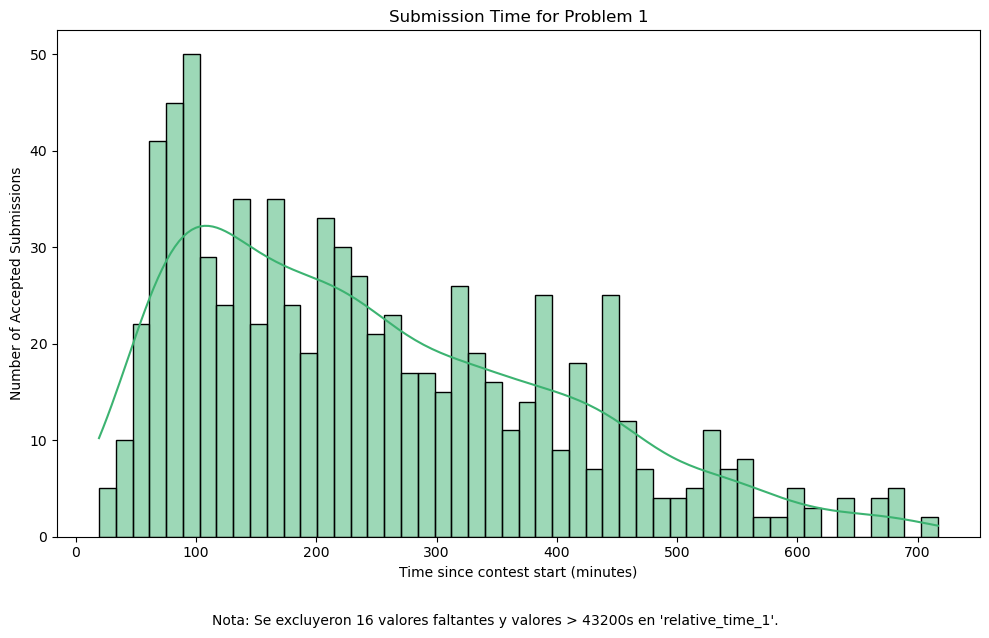

In [531]:
import seaborn as sns
import matplotlib.pyplot as plt

# Valores originales
all_values = final_df['relative_time_1']
missing_count = all_values.isna().sum()

# Filtrar valores válidos y realistas (ej. menos de 12 horas = 43200 segundos)
valid_times = all_values[(all_values.notna()) & (all_values < 43200)]

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.histplot(valid_times / 60, bins=50, kde=True, color='mediumseagreen')  # en minutos

plt.title("Submission Time for Problem 1")
plt.xlabel("Time since contest start (minutes)")
plt.ylabel("Number of Accepted Submissions")

# Nota al pie
plt.figtext(0.5, -0.05, 
            f"Nota: Se excluyeron {missing_count} valores faltantes y valores > 43200s en 'relative_time_1'.", 
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()


* Interpretation: The distribution is right-skewed with a peak around 100 minutes, indicating most users solve 
* Problem 1 early. A significant number of submissions extend to 10–12 hours, showing variability in solving times.

1.2 Histogram for submission time for all questions

/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

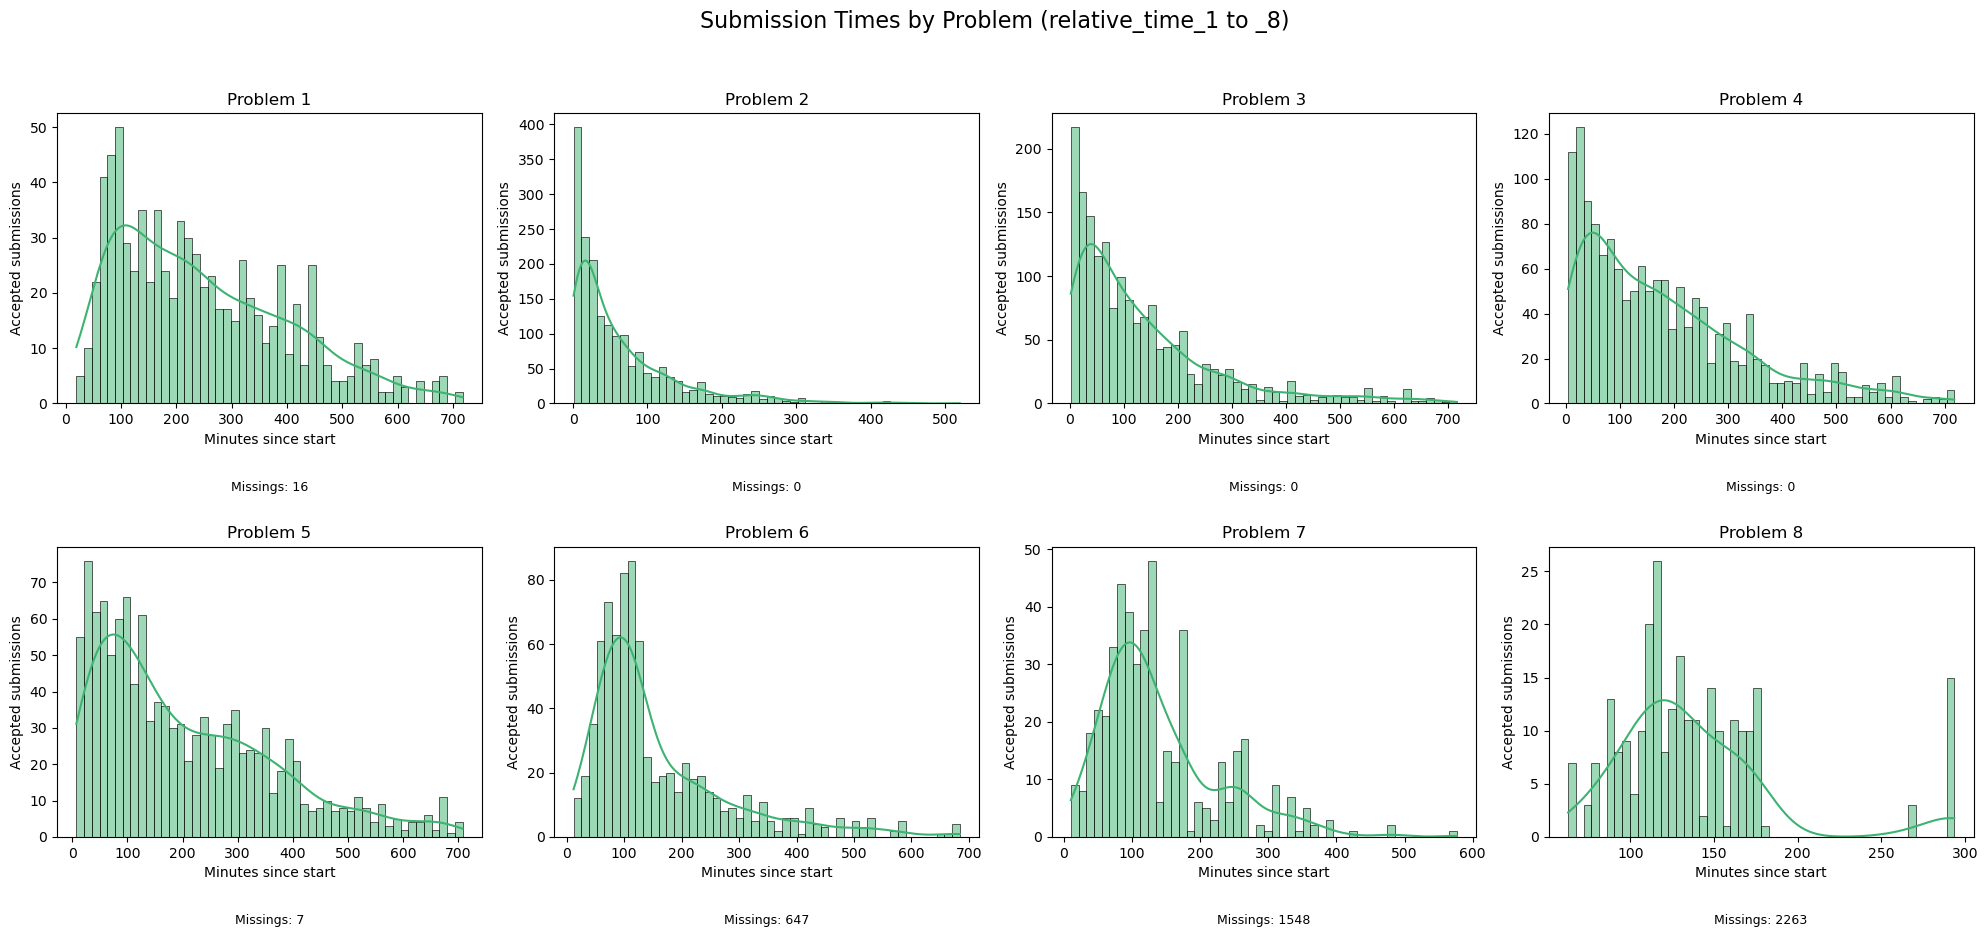

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas que representan el tiempo relativo por problema
relative_cols = [f'relative_time_{i}' for i in range(1, 9)]

# Crear figura con subgráficos (2 filas x 4 columnas)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Loop para graficar cada variable
for i, col in enumerate(relative_cols):
    data = final_df[col]
    missing_count = data.isna().sum()
    valid_times = data[data.notna() & data.between(0, 43200)]

    sns.histplot(valid_times / 60, bins=50, kde=True, ax=axes[i], color='mediumseagreen')
    axes[i].set_title(f"Problem {i+1}")
    axes[i].set_xlabel("Minutes since start")
    axes[i].set_ylabel("Accepted submissions")
    
    # Nota sobre los datos faltantes
    axes[i].text(0.5, -0.3, f"Missings: {missing_count}", 
                 transform=axes[i].transAxes, ha='center', fontsize=9)

# Título general del gráfico
plt.suptitle("Submission Times by Problem (relative_time_1 to _8)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

* Interpretation: Distributions are typically right-skewed, with peaks in the first 50–100 minutes. 
* Submission rates decrease for later problems, indicating fewer users solve higher-numbered problems.


1.3 Distribución de tiempos de envío para relative_time_1 por concurso

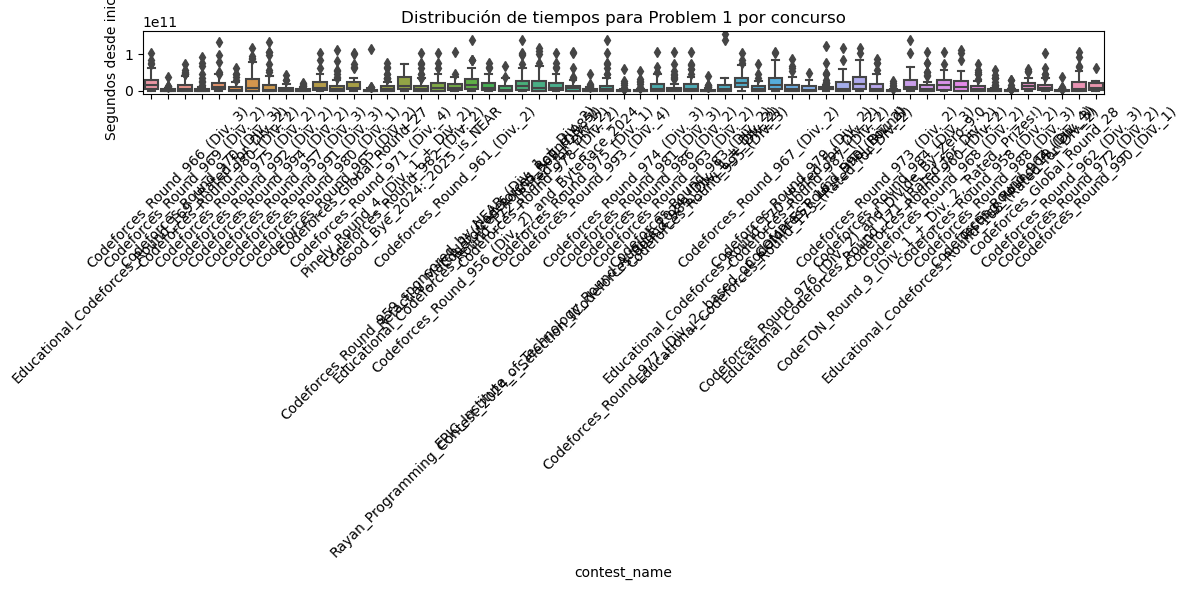

In [533]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df, x='contest_name', y='relative_time_1')
plt.xticks(rotation=45)
plt.title("Distribución de tiempos para Problem 1 por concurso")
plt.ylabel("Segundos desde inicio")
plt.tight_layout()
plt.show()

1.4 Distribución de tiempos para Problem 1 (Top 10 concursos con tiempo promedio más alto)

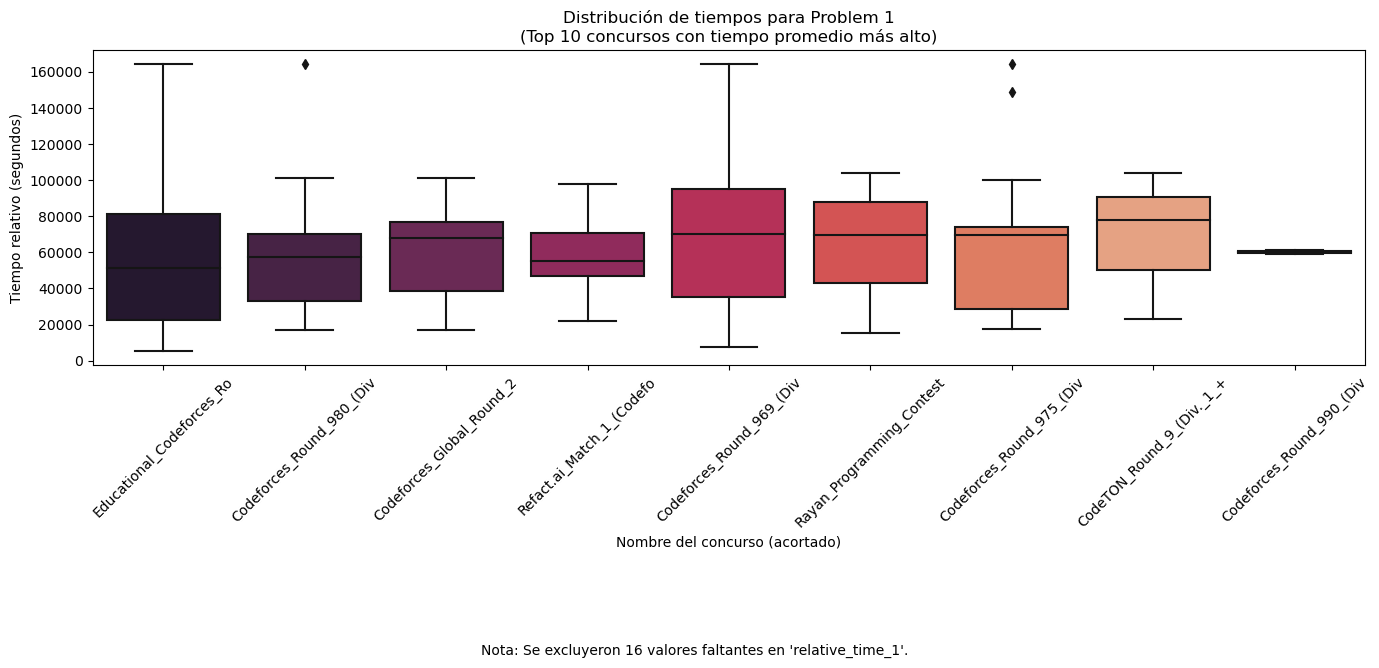

In [534]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar valores faltantes
missing_count = final_df["relative_time_1"].isna().sum()

# Filtrar datos válidos
valid_df = final_df[final_df["relative_time_1"].notna() & final_df["relative_time_1"].between(0, 1e7)]

# Calcular los 10 concursos con mayor tiempo promedio
avg_times_high = valid_df.groupby("contest_name")["relative_time_1"]\
                         .mean().sort_values(ascending=False).head(10).index

# Subconjunto de esos concursos
subset_df = valid_df[valid_df["contest_name"].isin(avg_times_high)].copy()

# Crear nombres acortados (primeras 25 letras, puedes ajustar el número)
subset_df["short_name"] = subset_df["contest_name"].str.slice(0, 25)

# Graficar boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=subset_df, x="short_name", y="relative_time_1", palette="rocket")

plt.title("Distribución de tiempos para Problem 1\n(Top 10 concursos con tiempo promedio más alto)")
plt.xlabel("Nombre del concurso (acortado)")
plt.ylabel("Tiempo relativo (segundos)")
plt.xticks(rotation=45)

# Nota al pie con los missings
plt.figtext(0.5, -0.1, f"Nota: Se excluyeron {missing_count} valores faltantes en 'relative_time_1'.",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

* Interpretation: Contests like Educational Codeforces and Codeforces Round 969 show greater dispersion, 
* with many users solving Problem 1 late. Average times are similar across the top 10 contests.

### 2. Density kernel figure for users' maxmimum ratings

2.1 Smoothed Distribution of Maximum Ratings

/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


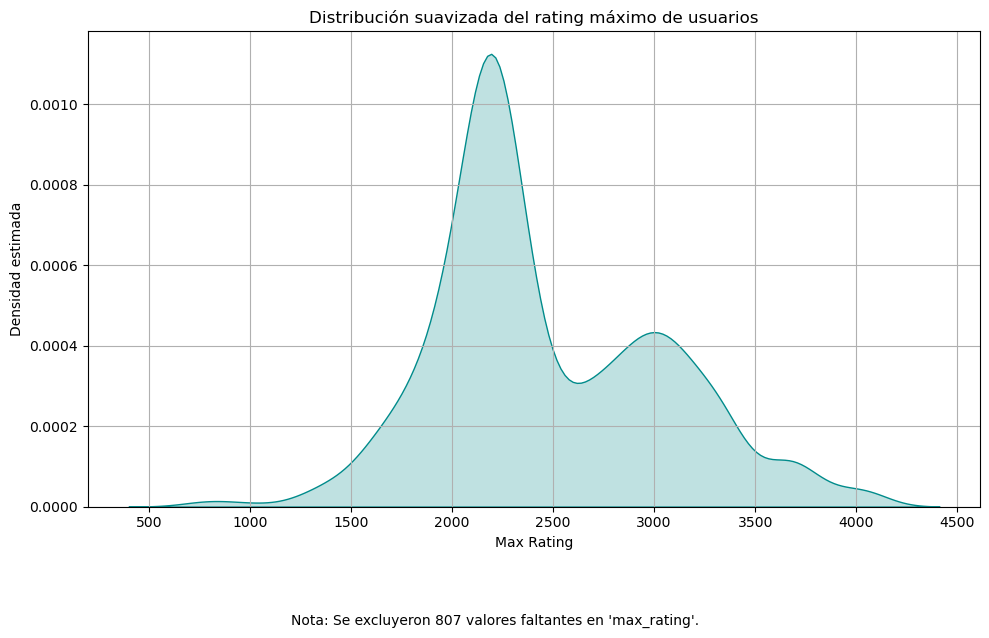

In [536]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar valores faltantes
missing = final_df['max_rating'].isna().sum()

plt.figure(figsize=(10, 6))
sns.kdeplot(final_df['max_rating'].dropna(), fill=True, color='darkcyan')

plt.title("Distribución suavizada del rating máximo de usuarios")
plt.xlabel("Max Rating")
plt.ylabel("Densidad estimada")
plt.grid(True)

plt.figtext(0.5, -0.05, f"Nota: Se excluyeron {missing} valores faltantes en 'max_rating'.", 
            ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

* Interpretation: Two clear peaks are observed: one around 2100 points and a smaller one near 3000 points, 
* indicating a bimodal distribution of user skill levels.

2.2 KDE by Rating Group

/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/rominarattoyanez/anaconda3/lib/python3.10

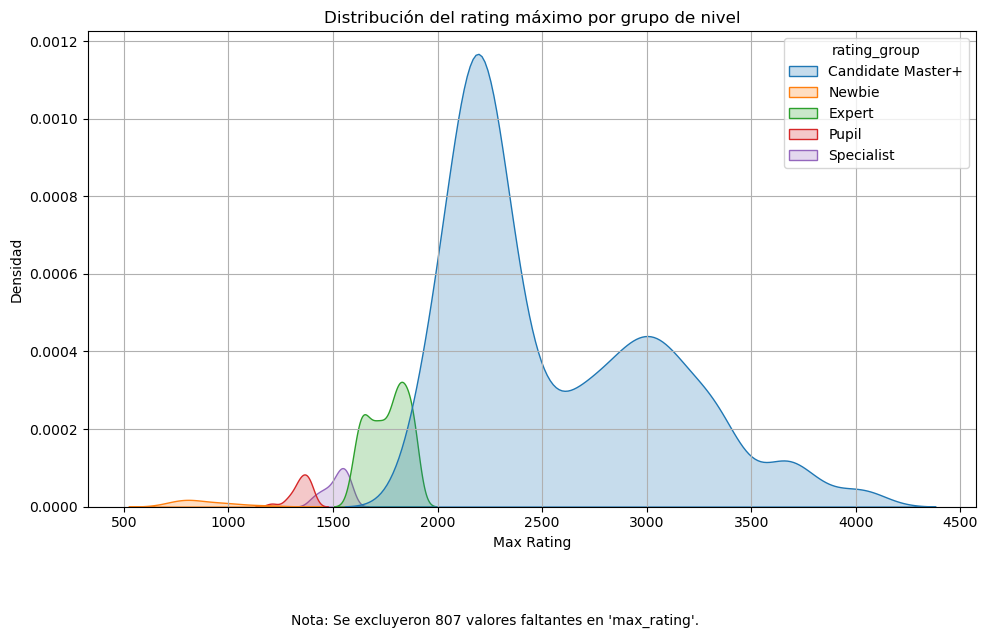

In [538]:
# Clasificar max_rating en grupos
def get_group(r):
    if pd.isna(r): return None
    elif r < 1200: return "Newbie"
    elif r < 1400: return "Pupil"
    elif r < 1600: return "Specialist"
    elif r < 1900: return "Expert"
    else: return "Candidate Master+"

final_df["rating_group"] = final_df["max_rating"].apply(get_group)
missing = final_df['max_rating'].isna().sum()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_df.dropna(subset=['max_rating']), 
            x='max_rating', hue='rating_group', fill=True)

plt.title("Distribución del rating máximo por grupo de nivel")
plt.xlabel("Max Rating")
plt.ylabel("Densidad")
plt.grid(True)

plt.figtext(0.5, -0.05, f"Nota: Se excluyeron {missing} valores faltantes en 'max_rating'.", 
            ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

* Interpretation: The Candidate Master+ group dominates, with a prominent curve indicating most users 
* have a max_rating above 1900, suggesting a highly competitive sample. Bimodality within this group 
* and minimal overlap between groups indicate well-defined skill categories.





### 3. Boxplots of language vs. time_to_answer

3.1 Time to Solve All Problems by Programming Language

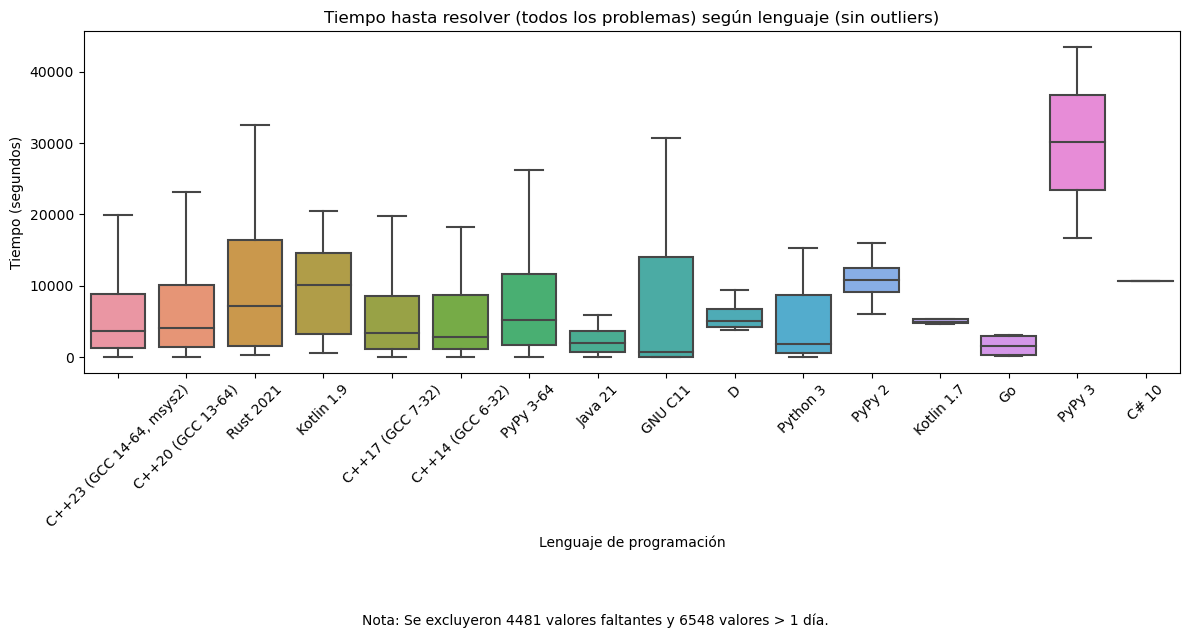

In [542]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Derretir el DataFrame para obtener todos los tiempos de respuesta
df_melt = final_df.melt(
    id_vars=["1_language"],
    value_vars=[f"time_to_answer_{i}" for i in range(1, 9)],
    var_name="Problema",
    value_name="Tiempo"
)

# Contar valores faltantes y outliers
missing_total = df_melt["Tiempo"].isna().sum()
outliers_total = (df_melt["Tiempo"] >= 86400).sum()

# Filtrar tiempos válidos (< 1 día)
df_melt_clean = df_melt[df_melt["Tiempo"] < 86400]

# Crear boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melt_clean, x="1_language", y="Tiempo", showfliers=False)

plt.title("Tiempo hasta resolver (todos los problemas) según lenguaje (sin outliers)")
plt.xlabel("Lenguaje de programación")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45)

# Nota de exclusión de datos
plt.figtext(0.5, -0.05, 
            f"Nota: Se excluyeron {missing_total} valores faltantes y {outliers_total} valores > 1 día.",
            ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

* Interpretation: Languages like Go, Kotlin 1.7, D, and Java 21 show lower, compact boxes, indicating 
* faster average solving times. PyPy 3 and PyPy 2 have higher boxes, suggesting slower solving times. 
* Outliers were excluded for clarity.

3.2 Time to Solve by Language and Problem

Text(0.5, 0.02, "Nota: Se excluyeron 4481 valores faltantes en 'time_to_answer_1-8'.")

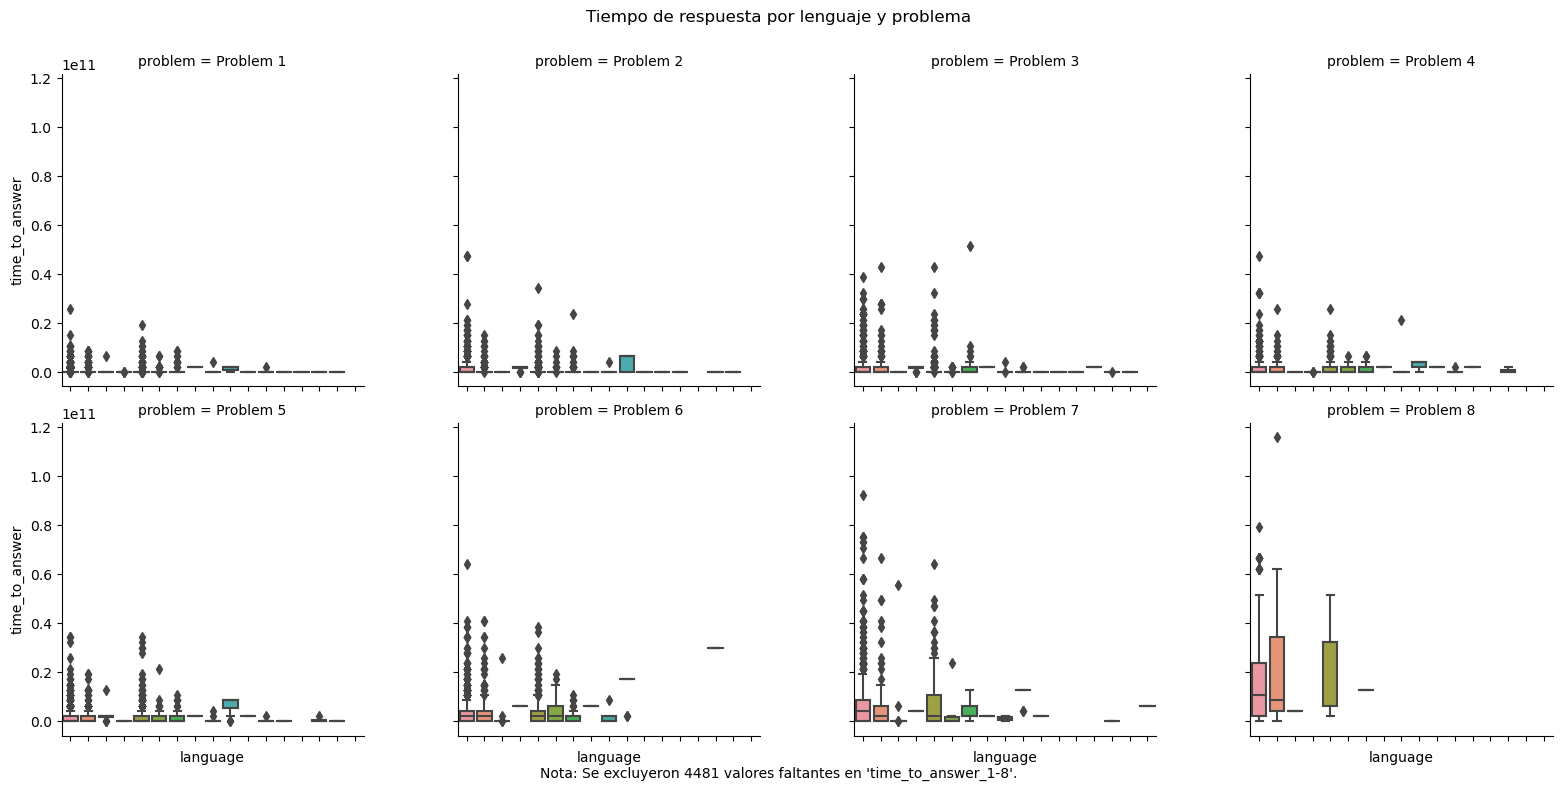

In [543]:
import pandas as pd

# Combinar en un solo DataFrame largo
dfs = []
total_missing = 0
for i in range(1, 9):
    df_temp = final_df[[f"{i}_language", f"time_to_answer_{i}"]].copy()
    df_temp.columns = ["language", "time_to_answer"]
    df_temp["problem"] = f"Problem {i}"
    total_missing += df_temp["time_to_answer"].isna().sum()
    dfs.append(df_temp)

df_all = pd.concat(dfs)

# Graficar
g = sns.catplot(data=df_all, x="language", y="time_to_answer", 
                col="problem", kind="box", col_wrap=4, height=4)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Tiempo de respuesta por lenguaje y problema")

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Nota de missings
g.fig.text(0.5, 0.02, f"Nota: Se excluyeron {total_missing} valores faltantes en 'time_to_answer_1-8'.",
           ha='center', fontsize=10)

### 4. Binscatter for rating vs time_to_answer: 

4.1 Average Time to Solve Problem 1 by Rating

/var/folders/ss/cd9tm42d70b4w66dyk07_fzm0000gn/T/ipykernel_13709/3534459927.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["rating_bin"] = pd.cut(df_clean["rating"], bins=10)
/var/folders/ss/cd9tm42d70b4w66dyk07_fzm0000gn/T/ipykernel_13709/3534459927.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = df_clean.groupby("rating_bin")["time_to_answer_1"].mean().reset_index()
/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be c

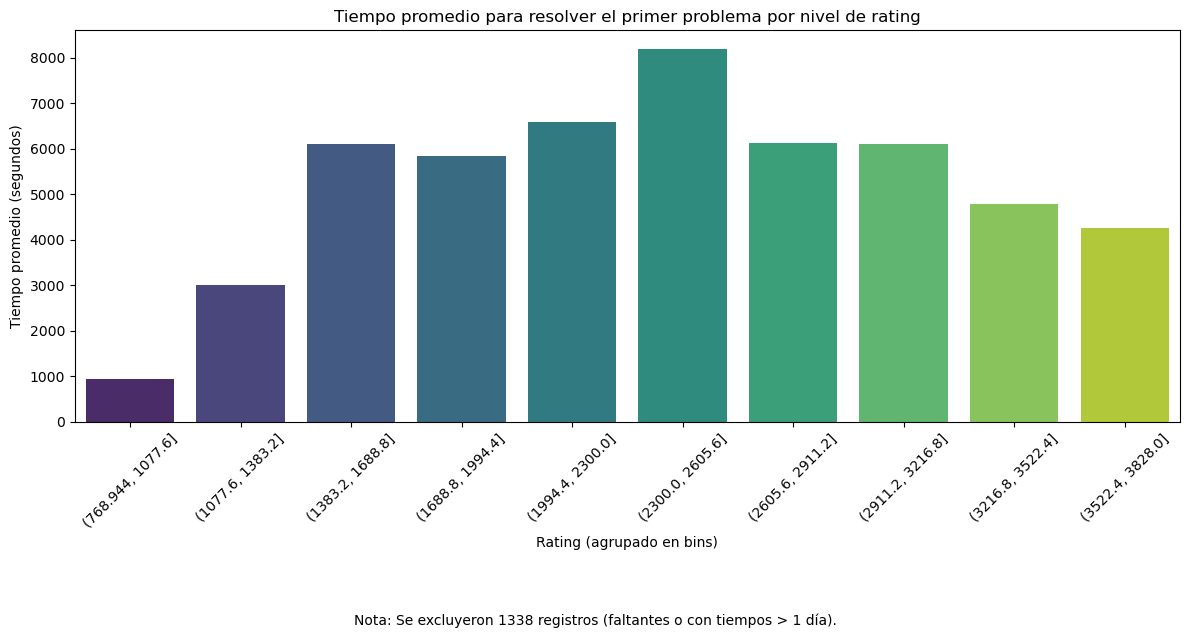

In [547]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Filtrar registros válidos
df_clean = final_df[
    final_df["rating"].notna() & 
    final_df["time_to_answer_1"].notna() & 
    (final_df["time_to_answer_1"] <= 86400)  # Filtrar valores absurdos (>1 día)
]

# Contar valores excluidos
missing_rating = final_df["rating"].isna().sum()
missing_time = final_df["time_to_answer_1"].isna().sum()
extreme_values = (final_df["time_to_answer_1"] > 86400).sum()
total_excluidos = missing_rating + missing_time + extreme_values

# Paso 2: Agrupar en bins de rating
df_clean["rating_bin"] = pd.cut(df_clean["rating"], bins=10)

# Paso 3: Calcular promedio de tiempo por grupo de rating
mean_df = df_clean.groupby("rating_bin")["time_to_answer_1"].mean().reset_index()

# Paso 4: Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_df, x="rating_bin", y="time_to_answer_1", palette="viridis")

plt.title("Tiempo promedio para resolver el primer problema por nivel de rating")
plt.xlabel("Rating (agrupado en bins)")
plt.ylabel("Tiempo promedio (segundos)")
plt.xticks(rotation=45)

# Nota al pie con valores excluidos
plt.figtext(0.5, -0.05,
            f"Nota: Se excluyeron {total_excluidos} registros (faltantes o con tiempos > 1 día).",
            ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


* Interpretation: From the 2300–2605 rating bin upward, there is a clear progressive reduction in 
* average solving time. Interestingly, the average time peaks in the 2300–2605 bin, increasing from 
* lower ratings (~770) to this point. Outliers were excluded.

4.2 Average Time to Solve Problems (1–8) by Rating

/var/folders/ss/cd9tm42d70b4w66dyk07_fzm0000gn/T/ipykernel_13709/693168385.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg["rating_bin"] = pd.cut(df_avg["rating"], bins=10)
/var/folders/ss/cd9tm42d70b4w66dyk07_fzm0000gn/T/ipykernel_13709/693168385.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df_avg = df_avg.groupby("rating_bin")["time_to_answer_mean"].mean().reset_index()
/Users/rominarattoyanez/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be ch

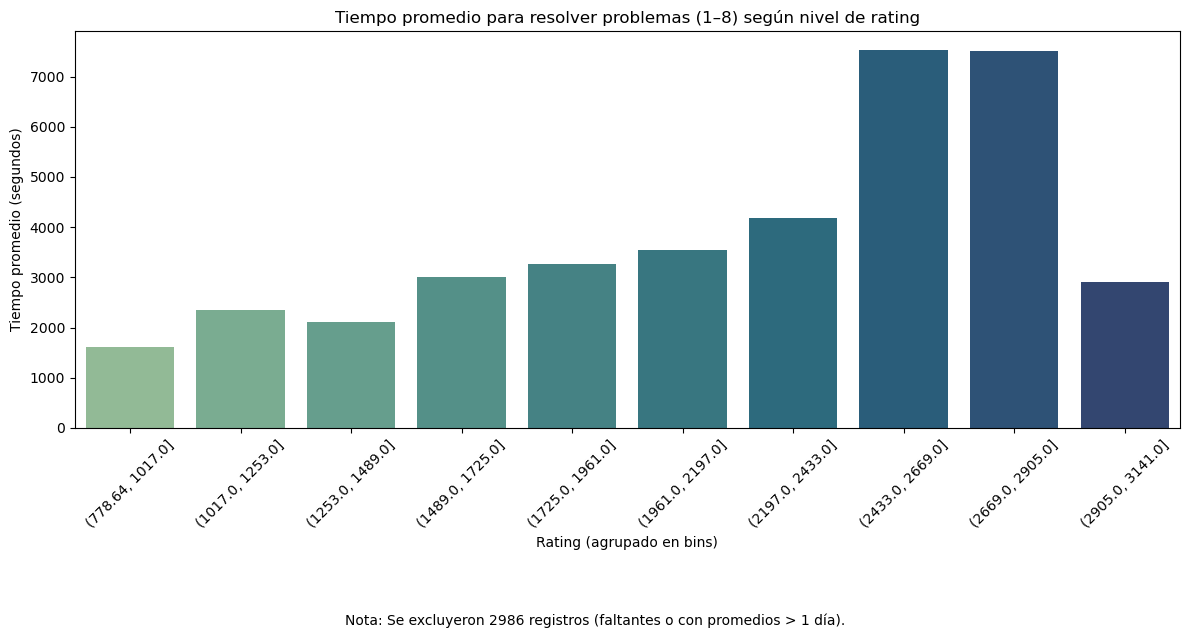

In [549]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Calcular promedio de todos los time_to_answer
time_cols = [f"time_to_answer_{i}" for i in range(1, 9)]
final_df["time_to_answer_mean"] = final_df[time_cols].mean(axis=1)

# Paso 2: Filtrar registros válidos
df_avg = final_df[
    final_df["rating"].notna() &
    final_df["time_to_answer_mean"].notna() &
    (final_df["time_to_answer_mean"] <= 86400)  # Excluir promedios mayores a 1 día
]

# Paso 3: Contar excluidos
missing_rating = final_df["rating"].isna().sum()
missing_mean = final_df["time_to_answer_mean"].isna().sum()
extreme_mean = (final_df["time_to_answer_mean"] > 86400).sum()
total_excluidos = missing_rating + missing_mean + extreme_mean

# Paso 4: Crear bins y calcular medias por grupo
df_avg["rating_bin"] = pd.cut(df_avg["rating"], bins=10)
mean_df_avg = df_avg.groupby("rating_bin")["time_to_answer_mean"].mean().reset_index()

# Paso 5: Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_df_avg, x="rating_bin", y="time_to_answer_mean", palette="crest")

plt.title("Tiempo promedio para resolver problemas (1–8) según nivel de rating")
plt.xlabel("Rating (agrupado en bins)")
plt.ylabel("Tiempo promedio (segundos)")
plt.xticks(rotation=45)

# Nota al pie con número de registros excluidos
plt.figtext(0.5, -0.05,
            f"Nota: Se excluyeron {total_excluidos} registros (faltantes o con promedios > 1 día).",
            ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


* Interpretation: The average solving time increases from low ratings (778–2400) to a peak in the 
* 2433–2905 bin. The highest rating group (2950–3140) shows a marked reduction in average time (~2900s). 
* Outliers were excluded.

### 5. Basic linear regression for rating vs rating_achieved (with scatter plot and regression line)

5.1 Linear Regression: Rating vs. Rating Achieved

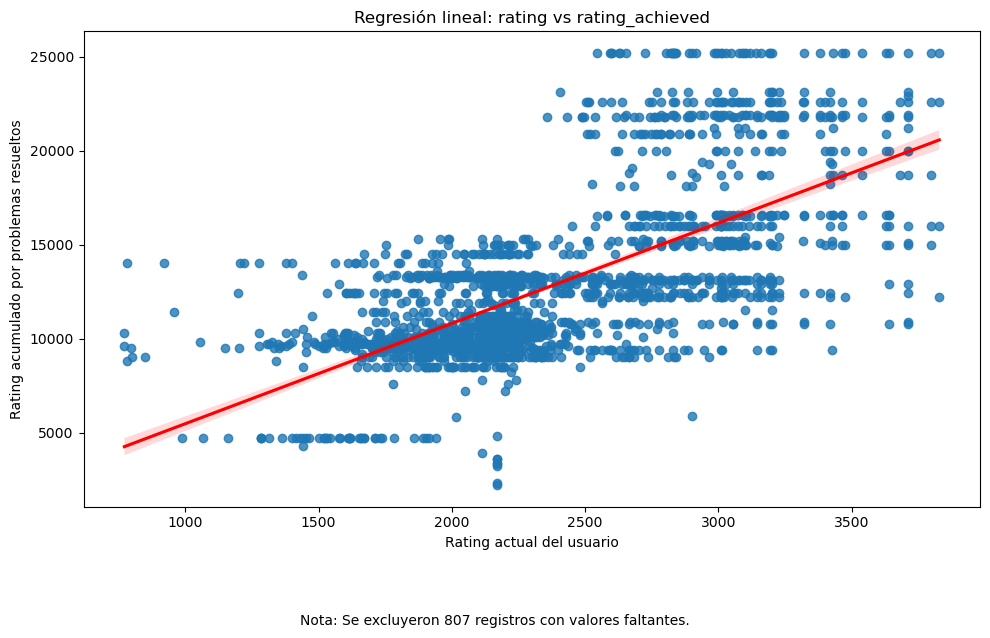

In [551]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos válidos
df_valid = final_df[final_df["rating"].notna() & final_df["rating_achieved"].notna()]

# Gráfico
plt.figure(figsize=(10, 6))
sns.regplot(data=df_valid, x="rating", y="rating_achieved", line_kws={'color': 'red'})

plt.title("Regresión lineal: rating vs rating_achieved")
plt.xlabel("Rating actual del usuario")
plt.ylabel("Rating acumulado por problemas resueltos")
plt.figtext(0.5, -0.05, f"Nota: Se excluyeron {len(final_df) - len(df_valid)} registros con valores faltantes.",
            ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

* Interpretation: There is a clear positive relationship: higher user ratings correspond to higher 
* rating_achieved values. This is expected, as users with higher ratings tend to solve more difficult 
* problems with higher individual ratings. However, there is high dispersion, with users of similar 
* ratings achieving varied rating_achieved values.

5.2 Linear Regression: Rating vs. Rating Achieved by Group

<Figure size 1000x600 with 0 Axes>

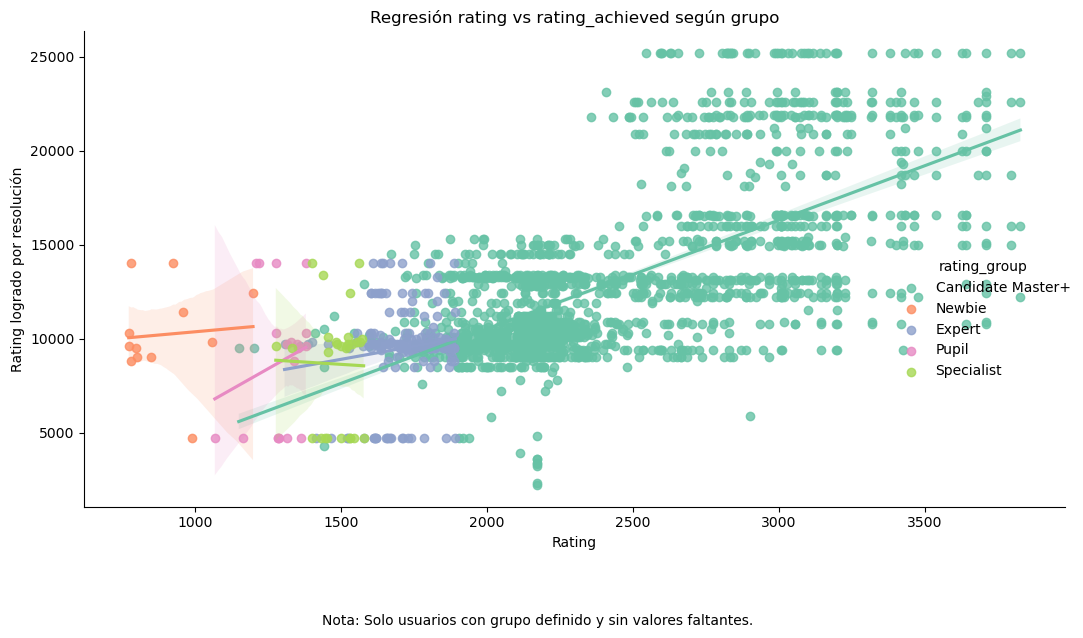

In [552]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df_valid, x="rating", y="rating_achieved", hue="rating_group", 
           palette="Set2", aspect=1.5, height=6)

plt.title("Regresión rating vs rating_achieved según grupo")
plt.xlabel("Rating")
plt.ylabel("Rating logrado por resolución")
plt.figtext(0.5, -0.05, f"Nota: Solo usuarios con grupo definido y sin valores faltantes.",
            ha='center', fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

* Interpretation: The Candidate Master+ group (light green) shows a steeper slope and a wider range 
* in rating_achieved, indicating stronger performance among higher-rated users.